## Using SHAP to Visualize the Classification 
This short notebook utilizes SHAP, a relatively new library, to visualize which features (in this case words), count towards each class when the newspaper articles in the dataset are classified as either REAL or FAKE, using the ```LogisticRegression``` classifier. 
To run the code in the notebook run ```setup_shap.sh``` in the terminal; this will install scikit-learn, joblib, shap, pandas and matplotlib. Note that because of the notebook format it cannot be run in the virtual envrionment like the .py scripts.

### Import Modules

In [2]:
import numpy as np
import sklearn
import shap
import os
from joblib import dump, load
import pandas as pd
import matplotlib.pyplot as plt
shap.initjs()

### Load in Data and Models 
The split test and train data, as well as the feature names are loaded. The saved ```LogisticRegression``` classifier is also retreived. 

In [3]:
y_train, y_test, X_train_features, X_test_features, feature_names = pd.read_pickle(os.path.join("..", "out", "features.pkl"))
LRC = load(os.path.join("..", "models", "LRC_accuracy_GS.joblib"))

### SHAP Visualizations
To create the visualization three elements are needed; the explainer (class that computes the 'shap-values' used by the library, defined by the fitted model and the training data), the shap_values (the test data converted to 'shap-values') and the test data as an array. 

The visalizations are displayed using javascript, and if saved with for example matplotlib looses a lot of information, why I have chosen to keep them in this notebook. To easily create visualization of different articles in the dataset the function LRC_shapplot() can be used below. (In addition to the SHAP plot, the function also returns the classification label for the given index; REAL or FAKE). 

In [4]:
explainer = shap.LinearExplainer(LRC, X_train_features)
shap_values = explainer.shap_values(X_test_features)
X_test_array = X_test_features.toarray() 
y_test_array = y_test.array

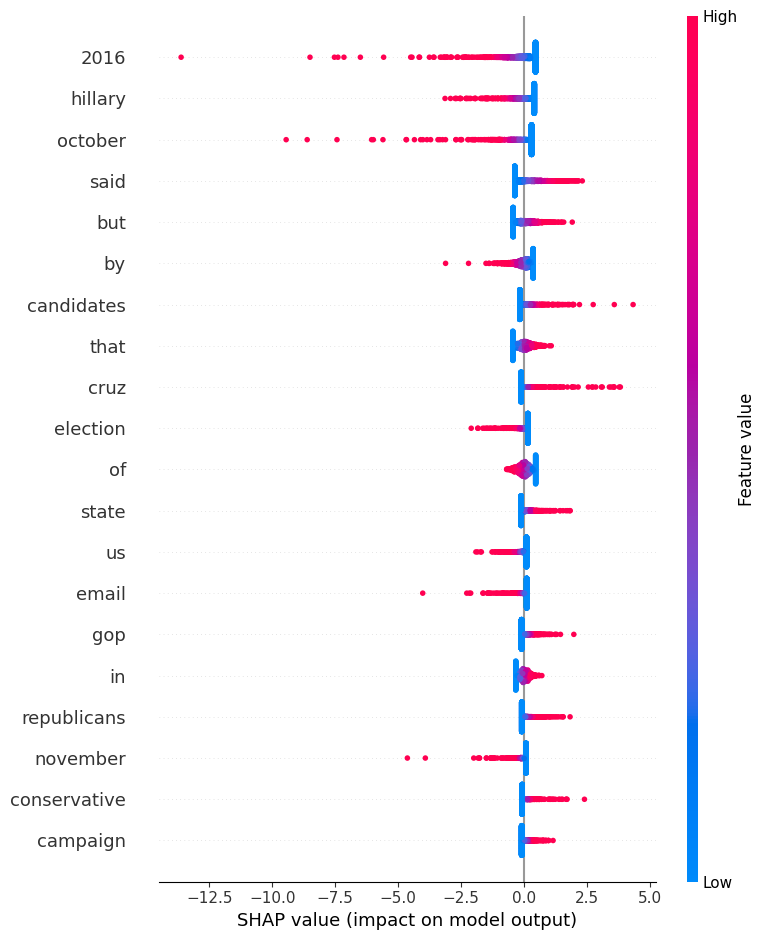

In [5]:
shap.summary_plot(shap_values, X_test_array, feature_names=feature_names, show=False)
plt.savefig("test.png")

In [23]:
def LRC_shapplot(ind):
    plot = shap.plots.force(explainer.expected_value, 
                            shap_values[ind,:], 
                            X_test_array[ind,:],
                            feature_names=feature_names, 
                            contribution_threshold = 0.05)
    outpath = os.path.join("out", "shap_plots", f"plotI{ind}")
    shap.save_html(outpath, plot)
    return print(f"The y label for the article is: {y_test_array[ind]}.\nThe .html plot has been saved to {outpath}")

In [22]:
plot = LRC_shapplot(0)
shap.save_html("testing.html",plot )

FAKE


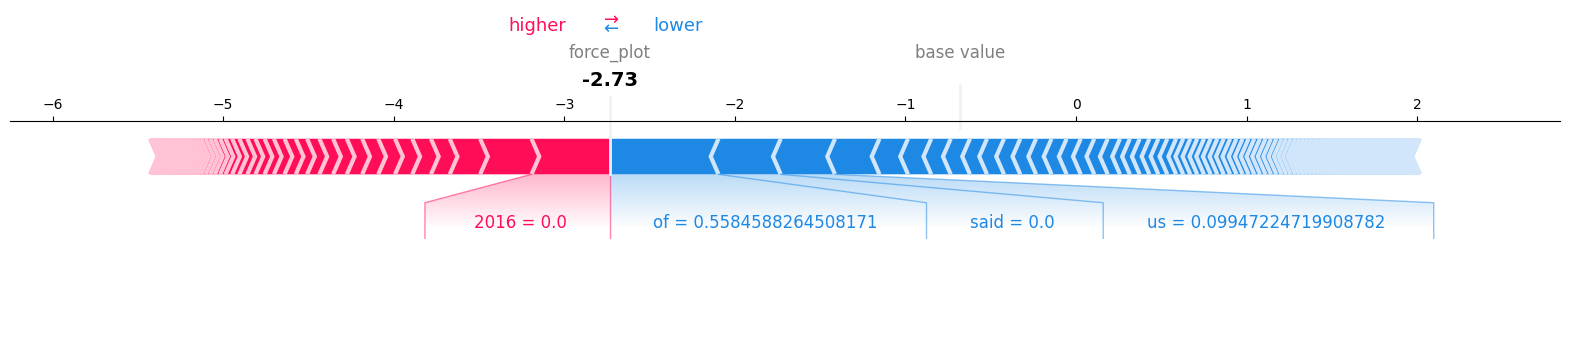

In [18]:
ind = 0
shap.plots.force(explainer.expected_value, 
                shap_values[ind,:], 
                X_test_array[ind,:],
                feature_names=feature_names, 
                matplotlib = True,
                show = False, 
                contribution_threshold = 0.05, 
                out_names = "force_plot"
                #figsize = (20,7
                
                           )
plt.savefig('score.png', dpi=1080)
plt.show()